In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from builder import *
import qiskit as qt
import qiskit_aer as qa

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='b5e45b71a67e93d98a42d7f03e9ac1039c749e024d112b9312b252c27ad6464bc9eb708ccb21ed1f403f924dc836c0306d9b5c64ac8815e656a59744b13d68ea'
)

backend = service.backend("ibm_brisbane")
aer = qa.AerSimulator.from_backend(backend)
aer_ideal = qa.AerSimulator()

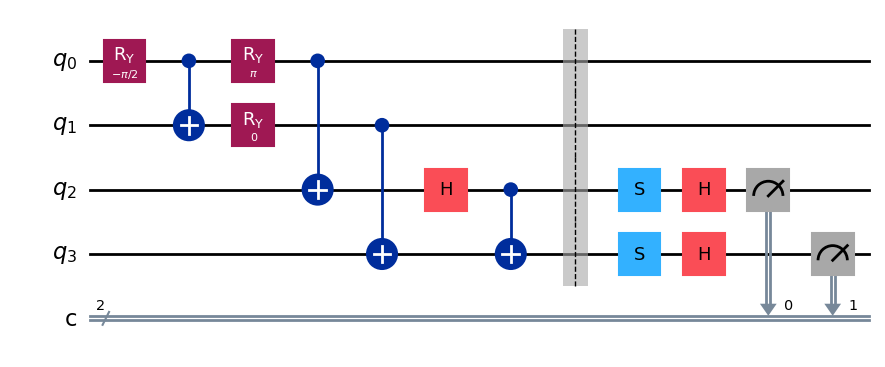

In [19]:
p = [0, 0.5, 0.5, 0]

C = qt.QuantumCircuit(4, 2, name= "cicuit")
circuit_prep = BDS_Preparation(probs= p).build()
circuit_meas = circuit_paulibell(2)
C.append(circuit_prep, [0, 1, 2, 3])
C.barrier()
C.append(circuit_meas, [2, 3], [0, 1])
C = C.decompose()
C.draw(output= 'mpl')

In [20]:
result = aer.run(qt.transpile(C, aer)).result()
result_ideal = aer_ideal.run(qt.transpile(C, aer_ideal)).result()

counts = result.get_counts(0)
counts_ideal = result_ideal.get_counts(0)

print(counts)
print(counts_ideal)

{'00': 496, '11': 477, '01': 20, '10': 31}
{'00': 519, '11': 505}
